In [1]:
!git clone https://github.com/MKDev121/NewsClassifier.git

Cloning into 'NewsClassifier'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 4), reused 9 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 26.57 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
!pip install pandas scikit-learn nltk

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
import matplotlib.pyplot as plt

nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [5]:
file_path = '/content/NewsClassifier/News_Category_Dataset_v3.json'
df2 = pd.read_json(file_path, lines=True)
df2['text'] = df2['headline'] + " " + df2['short_description']
df2 = df2[['category', 'text']]

/tmp/ipython-input-39-2888836584.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(categories[1])


17945


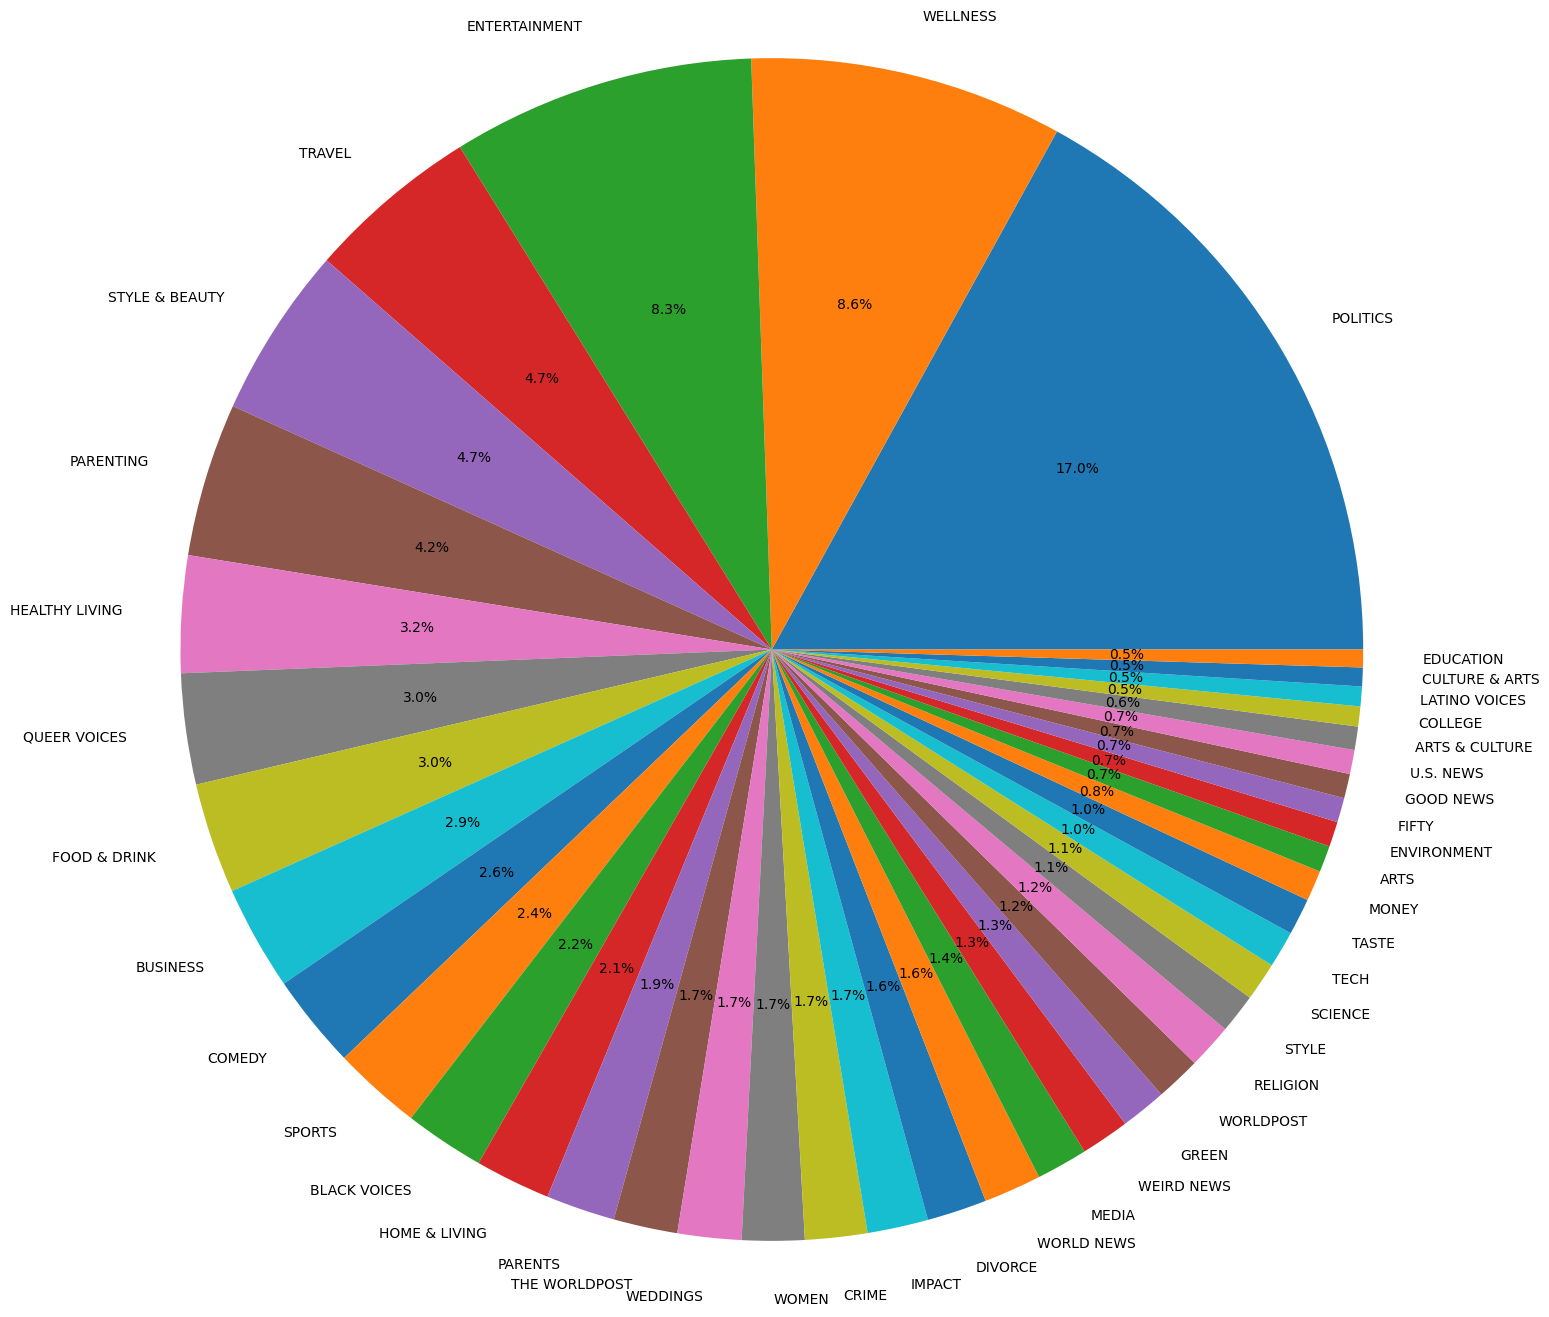

In [39]:
categories=df2['category'].value_counts()
print(categories[1])
plt.pie(categories.values,labels=categories.index,radius=4,autopct="%1.1f%%")
#plt.legend(categories.index,loc=4)
plt.show()


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df2['processed_text'] = df2['text'].apply(preprocess_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['category'], test_size=0.6)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB()),
])

In [ ]:
print("Training the model...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("Making predictions...")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model...
Training completed in 3.19 seconds (0.05 minutes)
Making predictions...
Accuracy: 0.4954

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.41      0.01      0.02       925
ARTS & CULTURE       1.00      0.00      0.00       810
  BLACK VOICES       0.59      0.06      0.11      2788
      BUSINESS       0.50      0.25      0.33      3590
       COLLEGE       1.00      0.00      0.00       678
        COMEDY       0.67      0.19      0.30      3193
         CRIME       0.52      0.43      0.47      2139
CULTURE & ARTS       0.62      0.01      0.02       606
       DIVORCE       0.88      0.40      0.55      2054
     EDUCATION       0.67      0.00      0.01       614
 ENTERTAINMENT       0.44      0.76      0.56     10409
   ENVIRONMENT       1.00      0.04      0.07       886
         FIFTY       1.00      0.00      0.00       865
  FOOD & DRINK       0.58      0.67      0.62      3807
     GOOD NEWS       0.6